## Frequentist Statistics

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

### Measure of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [3]:
x = st.skewnorm.rvs(10, size=1000)
x[:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

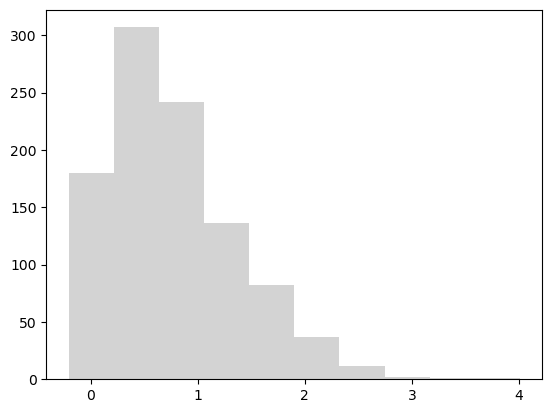

In [4]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [5]:
xbar = x.mean()
xbar

np.float64(0.7719211854654121)

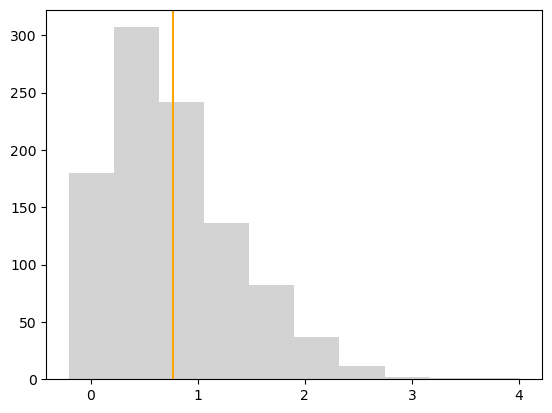

In [6]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [7]:
np.median(x)

np.float64(0.6514202574279577)

#### Mode

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

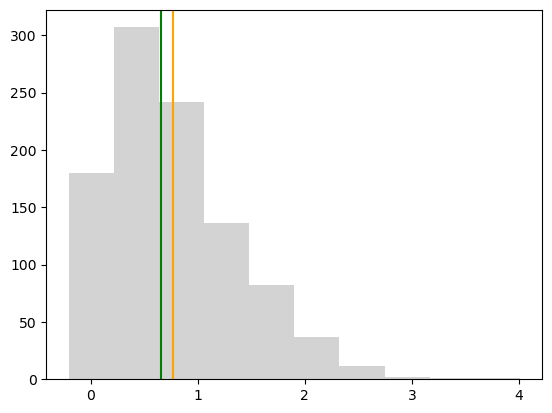

In [8]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measure of Dispersion

#### Variance

$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $

In [9]:
x.var()

np.float64(0.35528419278021617)

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:

$ \sigma = \sqrt{\sigma^2} $

In [10]:
x.var()**(1/2)

np.float64(0.5960572059628305)

In [11]:
sigma = np.std(x)
sigma

np.float64(0.5960572059628305)

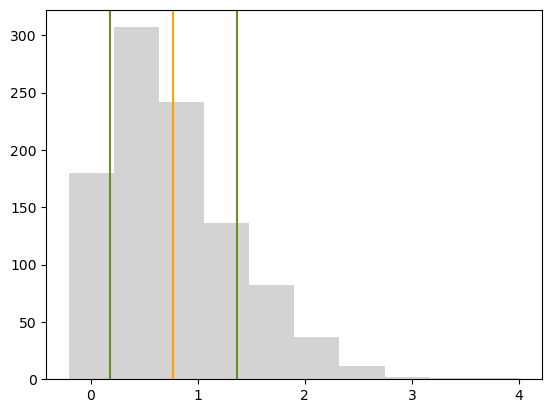

In [12]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_{\bar{x}}$:

$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $

In [13]:
sigma/(x.size)**(1/2)

np.float64(0.018848983865986414)

In [14]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

np.float64(0.018858415432183823)

In [15]:
st.sem(x, ddof=0)

np.float64(0.018848983865986414)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.


### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**:

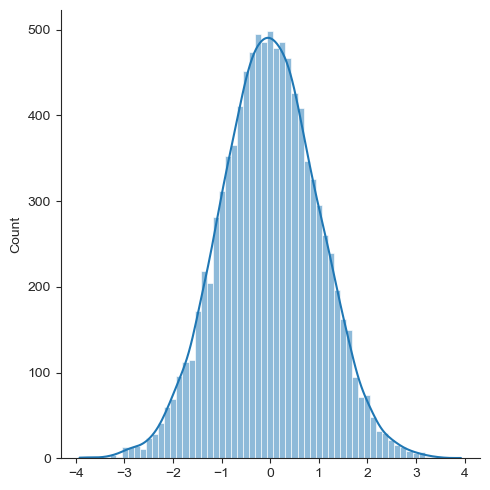

In [16]:
x = np.random.normal(size=10000)
sns.set_style('ticks')
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [17]:
x.mean()

np.float64(-0.016263054549091938)

In [18]:
x.std()

np.float64(1.0039756140435032)

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [19]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [20]:
x_sample.mean()

np.float64(-0.35958129882198664)

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [21]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

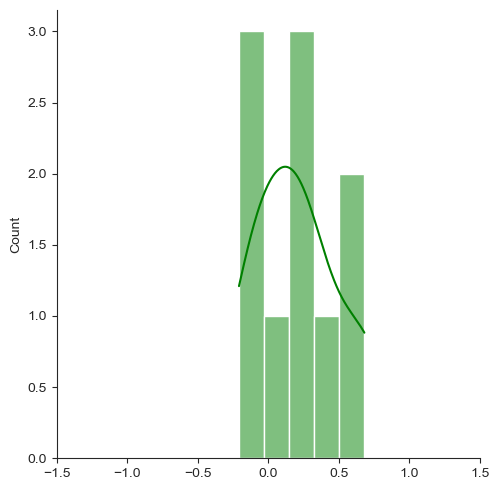

In [22]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

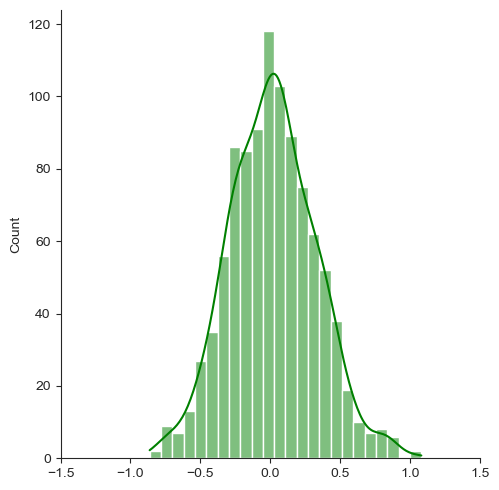

In [23]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

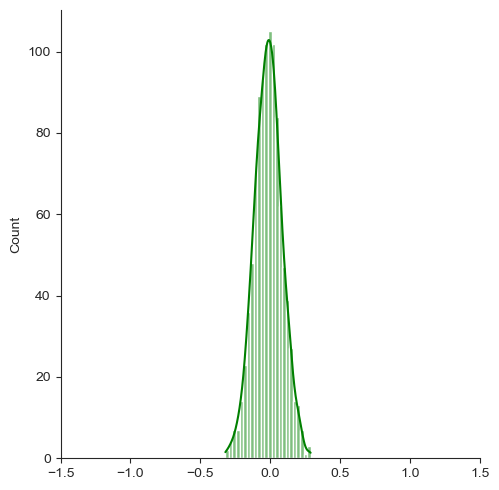

In [24]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

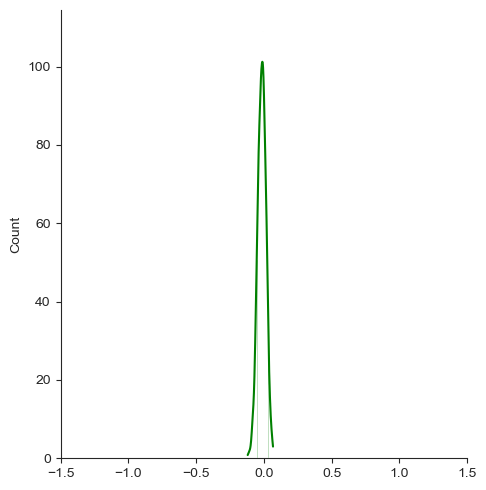

In [25]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

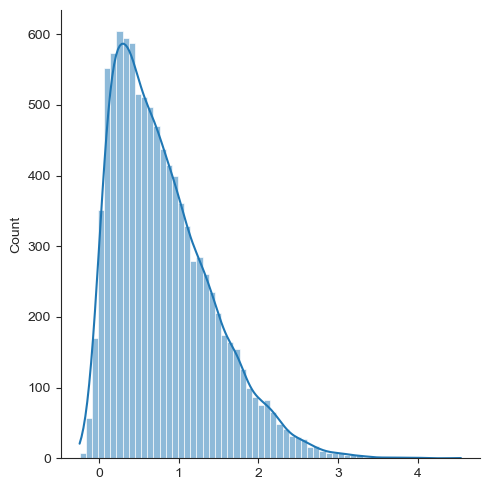

In [26]:
s = st.skewnorm.rvs(10, size=10000)
_ = sns.displot(s, kde=True)

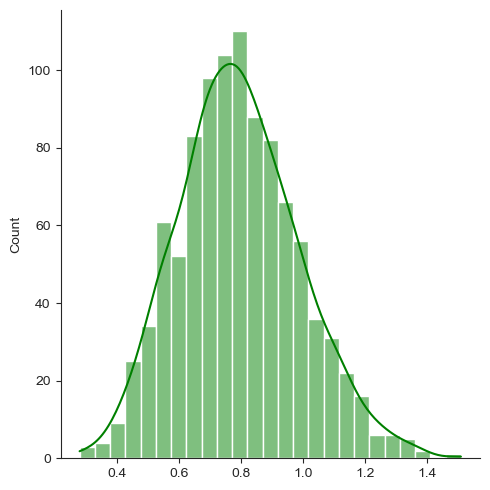

In [27]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

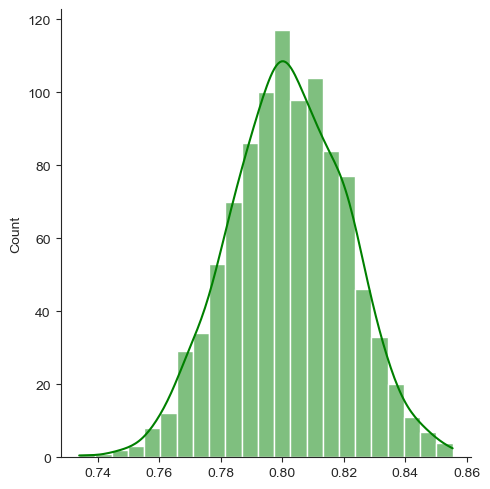

In [28]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

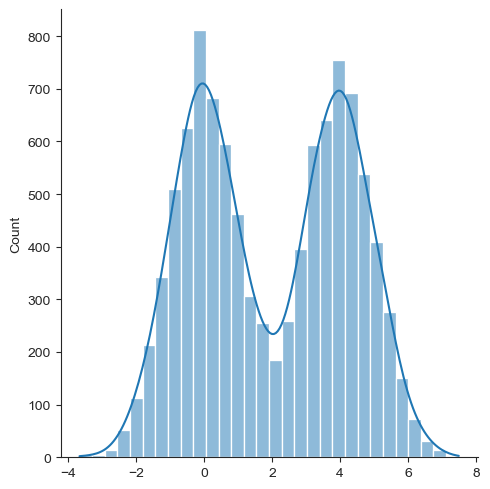

In [29]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
_ = sns.displot(m, kde=True)

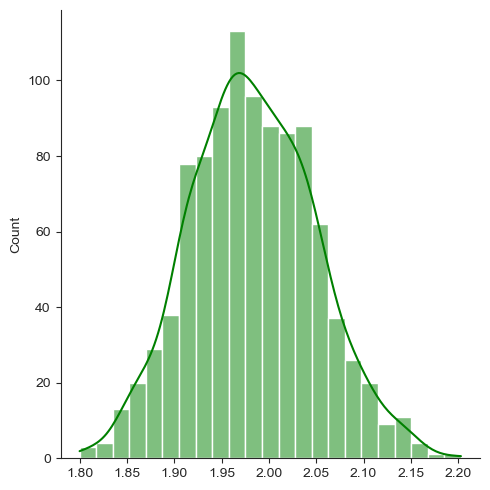

In [30]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Uniform distributions

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

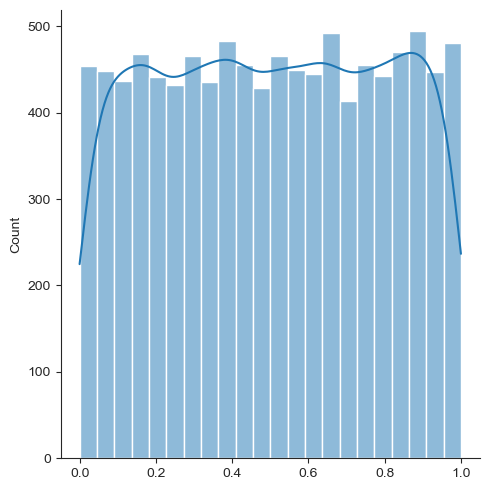

In [31]:
u = np.random.uniform(size=10000)
_ = sns.displot(u, kde=True)

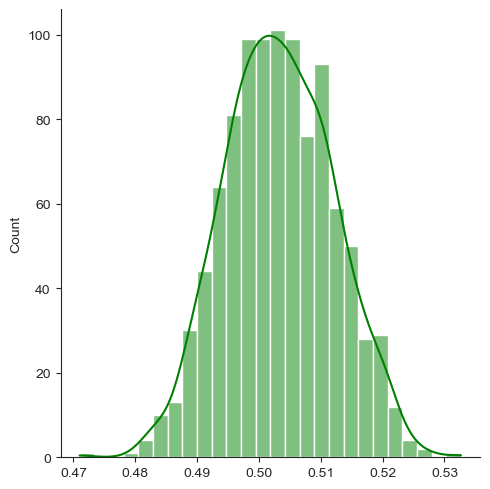

In [32]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

## Z-Score

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:

$ z = \frac{x_i-\mu}{\sigma} $

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [33]:
x_i = 85
mu = 60
sigma = 10

In [34]:
x = np.random.normal(mu, sigma, 10000)

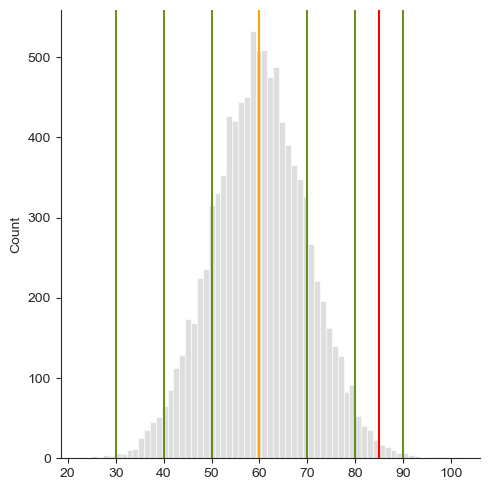

In [35]:
sns.displot(x, color='lightgray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')

_ = plt.axvline(x_i, color='red')

Your z-score is 2.5 std deviations above the mean

In [36]:
z = (x_i - mu) / sigma
z

2.5

or using our simulated class of 10l cs101 students: (sample mean and sample standard deviation)

In [37]:
z = (x_i - np.mean(x)) / np.std(x)
z

np.float64(2.5063103401632336)

Less than one percent of the class outperformed you:

In [38]:
len(np.where(x > x_i)[0])


69

In [39]:
(100 *66) / 10000

0.66

In [40]:
np.percentile(x, 99)

np.float64(83.35787058294662)

In contrast, if the mean score of your classmates is 90 and standard deviation is 2:

In [41]:
mu = 90
sigma = 2
y = np.random.normal(mu, sigma, 10000)

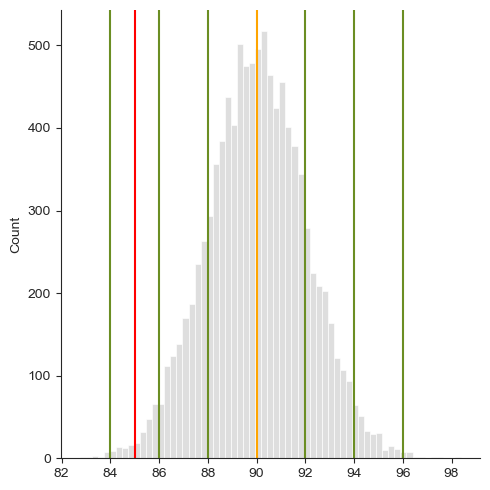

In [42]:
sns.displot(y, color='lightgray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')

_ = plt.axvline(x_i, color='red')

Now your score is 2.5 standard deviation below the mean !!

In [43]:
# using the population mean and population standard deviation
z = (x_i - mu) / sigma
z

-2.5

In [44]:
# using the sample mean and sample standard deviation
z = (x_i - np.mean(x)) / np.std(x)
z

np.float64(2.5063103401632336)

In [45]:
len(np.where(y > x_i)[0])

9933

In [46]:
100 * 9933 / 10000

99.33

A mere 67 folks attained worse:

In [47]:
np.percentile(y, 1)

np.float64(85.3781445632019)

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

**Exercises**

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch?
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition?

**Spoiler alert**: Solutions below

Solution 1:

$$x_i = 100 \text{ my score in clean and jerk competition}$$
$$\mu = 100 \text{ average score}$$
$$\sigma \text{ is not provided}$$

$$\text{So, here is the z-score formula} => z = \frac{x_i - \mu}{\sigma} => z = \frac{100 - 100}{\sigma} => 0$$



Solution 2:

$$x_i = 100 \text{, your score in snatch competition}$$
$$\mu = 80 \text{, average score}$$
$$\sigma = 10 \text{, standard deviation}$$

$$\text{So, here is the z-score formula} => z = \frac{x_i - \mu}{\sigma} => z = \frac {100 - 80}{10} => 2$$
$$\text{So, you are currently two standard deviation above the mean score for snatch competition}


Solution 3:

$$x_i = 200 \text{, your score in snatch competition}$$
$$\mu = 180 \text{, average score}$$
$$\sigma = 2 \text{, standard deviation}$$

$$\text{So, here is the z-score formula} => z = \frac{x_i - \mu}{\sigma} => z = \frac {200 - 180}{5} => 4$$
$$\text{So, you are currently two standard deviation above the mean score in the overall weighlifting competition}

## p-values

These quantify the *p*robability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time:
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [48]:
p_below = st.norm.cdf(-2.5)
p_below

np.float64(0.006209665325776134)

In [49]:
p_below  * 10000

np.float64(62.09665325776134)

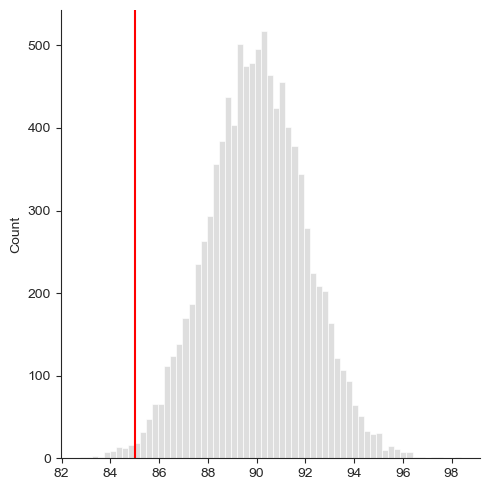

In [50]:
sns.displot(y, color='lightgray')
_ = plt.axvline(mu-2.5*sigma, color='red')

In [51]:
st.norm.cdf(2.5)

np.float64(0.9937903346742238)

In [52]:
p_above = 1 - st.norm.cdf(2.5)
p_above

np.float64(0.006209665325776159)

In [53]:
p_above * 10000

np.float64(62.09665325776159)

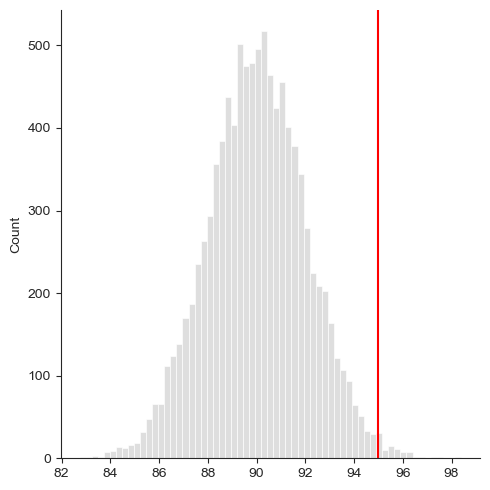

In [54]:
sns.displot(y, color='lightgray')
_ = plt.axvline(mu+2.5*sigma, color='red')

In [55]:
p_outside = p_below + p_above
p_outside

np.float64(0.012419330651552294)

In [56]:
p_outside * 10000

np.float64(124.19330651552293)

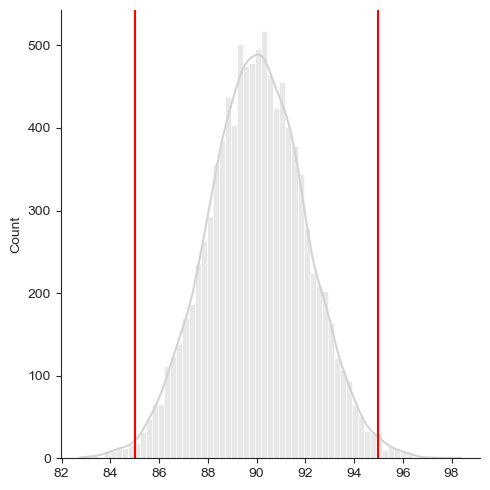

In [57]:
sns.displot(y, kde = True, color='lightgray')
_ = plt.axvline(mu-2.5*sigma, color='red')
_ = plt.axvline(mu+2.5*sigma, color='red')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb) for proof.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:

In [58]:
st.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [59]:
st.norm.ppf(0.975)

np.float64(1.959963984540054)

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

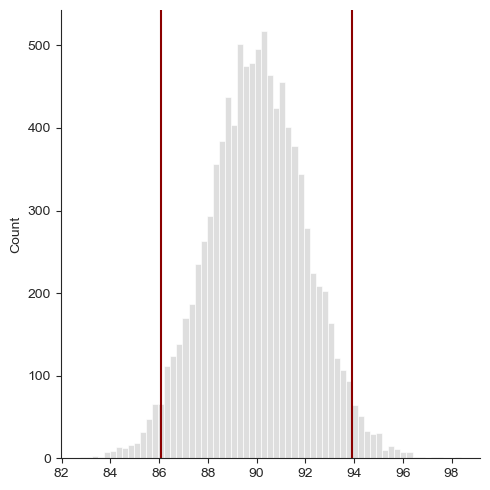

In [60]:
sns.displot(y, color='lightgray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

With a stricter threshold, say $\alpha = .01$:

In [65]:
st.norm.ppf(0.005)

np.float64(-2.575829303548901)

In [66]:
st.norm.ppf(0.995)

np.float64(2.5758293035489004)

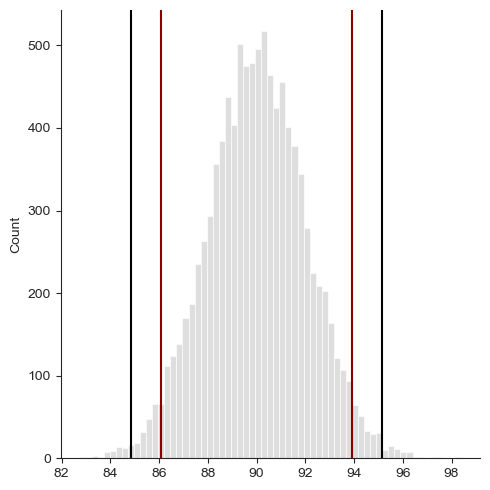

In [67]:
sns.displot(y, color='lightgray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.58*sigma, color='black')
_ = plt.axvline(mu-2.58*sigma, color='black')

(Time-permitting, a discussion of two-tailed vs one-tailed *p*-value tests would be informative here.)

**Exercises**

1. What are the *p*-values associated with your weightlifting results from the three preceding exercises?
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?

**Spoiler alert**: Solutions below

In [74]:
# p-value for clean and jerk competition
p_below = st.norm.cdf(0)
p_above = 1 - st.norm.cdf(0)

p_overall = p_below + p_above

p_below, p_above, p_overall

(np.float64(0.5), np.float64(0.5), np.float64(1.0))

In [ ]:
# p-value for snatch competition
#  Following the same calculations as we did for 1a, the p-value for an observation 2 standard deviations away from the mean is:
p_below =st.norm.cdf(-2)
p_above = 1 - st.norm.cdf(2)

p_overall = p_below + p_above

p_below, p_above, p_overall

(np.float64(0.022750131948179198),
 np.float64(0.02275013194817921),
 np.float64(0.0455002638963584))

In [ ]:
# p-value for overall competition
#  Following the same calculations as we did for 1b, the p-value for an observation 4 standard deviations away from the mean is:
p_below =st.norm.cdf(-4)
p_above = 1 - st.norm.cdf(4)

p_overall = p_below + p_above

p_below, p_above, p_overall

(np.float64(3.167124183311986e-05),
 np.float64(3.167124183311998e-05),
 np.float64(6.334248366623985e-05))

...which is about 0.0000633:

In [80]:
0.0000633

6.33e-05

In [81]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [82]:
p_from_z(4)

np.float64(6.334248366623973e-05)

(Incidentally, very small *p* values are often reported as **negative log *P*** values as these are much easier to read...)

In [83]:
-np.log10(p_from_z(4))

np.float64(4.198304911892499)

2. Solution: The absolute value of the *z*-score for your snatch as well as your combined score is greater than 1.96 so they're both "statistically significant". Your performance on the clean and jerk could not have been less significant!